In [1]:
import numpy as np
import timor
import argparse
import pygad
import os
from util import *
from timor.Module import *
from timor.utilities.visualization import animation
# import matplotlib.pyplot as plt
# import itertools
# from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm
from timor import ModuleAssembly, ModulesDB
from timor.Bodies import Body, Connector, Gender
from timor.configuration_search.GA import GA
from timor.utilities.visualization import MeshcatVisualizer, clear_visualizer
from timor.utilities.dtypes import Lexicographic
from timor.utilities.transformation import Transformation
from timor.utilities.spatial import rotX, rotY, rotZ
from timor.Module import AtomicModule, ModulesDB, ModuleHeader
from timor.Joints import Joint
from timor.Geometry import Box, ComposedGeometry, Cylinder, Sphere, Mesh

from reachability import Reachability
from generate_module import create_i_links, create_eef, create_revolute_joint
from timor_ga import *

2025-03-15 16:41:43,468 Timor INFO Loading custom configurations from /home/mscsim/.config/timor.config
2025-03-15 16:41:44,172 Timor INFO Getting robot modrob-gen2.
2025-03-15 16:41:44,173 Timor WARNING Could not fetch robot modrob-gen2 due to [Errno 17] File exists: '/home/mscsim/anaconda3/envs/timor-env/lib/python3.10/site-packages/cache/robots/modrob-gen2'.


In [2]:
r_4310_base = create_revolute_joint("assets/Assem_4310_BASE/Assem_4310_BASE/urdf/Assem_4310_BASE.urdf")
r_4305_joint = create_revolute_joint("assets/Assem_4305_JOINT/Assem_4305_JOINT/urdf/Assem_4305_JOINT.urdf")
r_4310_joint = create_revolute_joint("assets/Assem_4310_JOINT/Assem_4310_JOINT/urdf/Assem_4310_JOINT.urdf")

# Links
baseto4310_links = create_i_links(rod_name="baseto4310")
r4310to4305_links = create_i_links(rod_name="r4310to4305")
r4310to4310_links = create_i_links(rod_name="r4310to4310")

eef = create_eef()

# Create database
global db
db = ModulesDB()
db.add(r_4310_base)
db.add(r_4310_joint)
#db.add(r_4305_joint)
db = db.union(baseto4310_links)
#db = db.union(r4310to4305_links)
db = db.union(r4310to4310_links)
db = db.union(eef)
viz = db.debug_visualization()

You can open the visualizer by visiting the following URL:
http://127.0.0.1:7004/static/


In [3]:
optimized_results, ga = optimize(db, our_hyperparameters)

2025-03-15 16:41:49,565 Timor INFO Hyperparameters used: {"population_size": 40, "num_generations": 200, "num_genes": 20, "mutation_probability": 0.2, "num_parents_mating": 5, "keep_parents": 4, "keep_elitism": 5, "save_solutions_dir": null}
2025-03-15 16:41:49,567 Timor INFO Progress unit: ProgressUnit.GENERATIONS
Generations:   0%|          | 0/201 [00:00<?, ?it/s]/home/mscsim/anaconda3/envs/timor-env/lib/python3.10/site-packages/pygad/pygad.py:1136: UserWarning: Use the 'save_best_solutions' parameter with caution as it may cause memory overflow when either the number of generations or number of genes is large.
  warnings.warn("Use the 'save_best_solutions' parameter with caution as it may cause memory overflow when either the number of generations or number of genes is large.")
Generations:  45%|████▌     | 91/201 [11:11<11:27,  6.25s/it]/home/mscsim/anaconda3/envs/timor-env/lib/python3.10/site-packages/timor/Robot.py:828: RuntimeWarning: invalid value encountered in sqrt
  return 

In [10]:
best_solutions = ga._last_ga_instance.best_solutions_fitness
print(len(best_solutions))

201


In [16]:
fitness = []
for solution in best_solutions:
    fitness.append(solution.values[0])

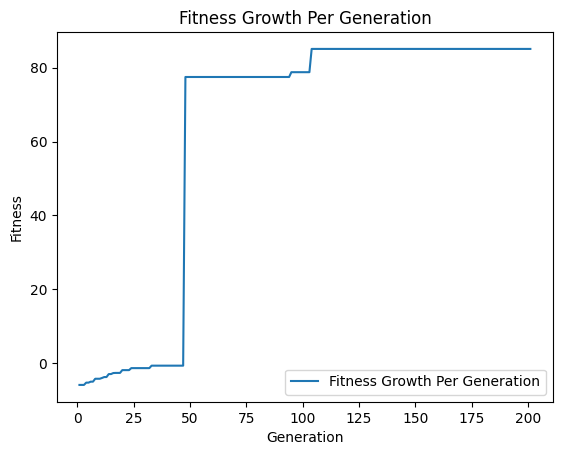

In [18]:
import matplotlib.pyplot as plt

plt.plot(range(1, 202), fitness, label="Fitness Growth Per Generation")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Fitness Growth Per Generation")

plt.legend()
plt.show()